In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_cat, batch_size=32 ,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2849 - accuracy: 0.9189 - val_loss: 0.1530 - val_accuracy: 0.9550
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1262 - accuracy: 0.9633 - val_loss: 0.1191 - val_accuracy: 0.9653
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9739 - val_loss: 0.1049 - val_accuracy: 0.9670
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.0973 - val_accuracy: 0.9703
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0510 - accuracy: 0.9851 - val_loss: 0.0948 - val_accuracy: 0.9722


In [16]:
model.evaluate(x_test,y_test_cat)


313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9732


[0.08721813559532166, 0.9732000231742859]

1/1 [==============================] - 0s 66ms/step
[[1.9245162e-07 6.8336359e-09 2.0285832e-05 4.0493233e-04 1.0590311e-10
  2.0231875e-10 6.4744488e-13 9.9955553e-01 1.1125093e-05 7.9483116e-06]]
Распознаная цифра: 7


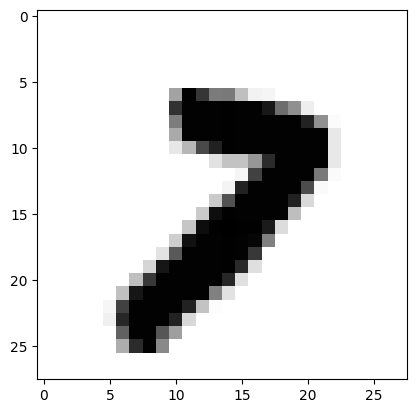

In [17]:
n = 171
x = np.expand_dims(x_test[n],axis=0)
res = model.predict(x)
print(res)
print(f"Распознаная цифра: {np.argmax(res)}")
plt.imshow(x_test[n],cmap=plt.cm.binary)
plt.show()

In [18]:
model.save('test_model.h5')